# Linear Approximation (Trend)

Author: Christoph Guettner

**Abstract**  
Im folgenden wird eine (lineare) Trendanalyse der Daten  
des ökologischen Anbaus (Quelle: Statistiches Bundesamt)  
in Deutschland durchgeführt. Die Daten wurden in den Jahren   
2008 - 2018 erhoben. Da die Residuen der Linearen   
Regression nicht unkorreliert sind, werden zwei weitere  
Möglichkeiten der Modellierung - polynome Regression  
und Data Split - in Betracht gezogen.  

## Table of Contents
* [Loading and Preprocessing](#Loading_and_Preprocessing)
    * [Class Imports](#Class_Imports)
    * [Classes and Functions](#Classes_and_Functions)
    * [Explorative Data Visualisation](#Explorative_Data_Visualisation)

* [Linear Regression](#Linear_Regression)
    * [Data_and_Resiudual_Plot](#Data_and_Resiudual_Plot)
    
* [Polynominal Regression](#Polynominal_Regression)
    * [Explanatory Data Visualisation](#Explanatory_Data_Visualisation)

## Loading_and_Preprocessing

### Class_Imports

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.cm import get_cmap
import seaborn as sns
from sklearn import linear_model
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
sns.set()


In [11]:
### Classes and Functions
class LinearRegression:

    def __init__(self, learning_rate = 0.001, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.slope = None
        self.bias = None

    def fit(self, x_value , y_value):
        n_samples, n_features = x_value.shape #hier len(X)=11

        # init parameters (hier haben wir die 
        # Anfangeswerte für die Parameter konfiguriert)
        self.slope = np.zeros(n_features)
        self.bias = -630

        # gradient descent  #Nun starten wir mit der for-loop
    
        for _ in range(self.iterations):
            y_approximated = np.dot(x_value, self.slope) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(x_value.T, (y_approximated - y_value))
            db = (1 / n_samples) * np.sum(y_approximated - y_value)

            # update parameters
            self.slope -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
        print ('The approximated Trend is: y = {} x + {}'.format(self.slope, self.bias))

    def predict(self, x_value):
        y_predicted = np.dot(x_value, self.slope) + self.bias
        return y_predicted

    def mean_squared_error(self, y_true, y_predicted):
        return np.mean((y_true - y_predicted)**2)

    def score():
        u = ((y_true - y_predicted) ** 2).sum()
        v = ((y_true - y_true.mean()) ** 2).sum()
        return 1 - (u/v)

def get_variables(x_column, y_column):
    X = x_column.values.reshape(-1,1)          #unabhängige Varible
    y = y_column.values   
    return X,y
    
#Abhängige Varible
#Visualize Dataset
def plot_data(X,y, df):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5), facecolor=(.18, .31, .31))
    fig.tight_layout()
    plt.title('Ökologischer Anbau', color ='0.7')
    ax1.scatter(X,y)
    ax1.set_xlabel('Zeit')
    ax1.set_ylabel('Prozent')
    ax1.legend(['data'])
    ax1.tick_params(labelcolor='tab:orange')
    ax2.patch.set_visible(False)
    ax2.axis('off')
    ax2.axis('tight')
    ax2.table(cellText=df.values, colLabels=df.columns, loc='center')
    plt.show()

def print_model_params(model_linear):
    return 'The approximated linear Trend is: y = {} x + {}: The Model-Score is {}'.format                                                      (model_linear.coef_, model_linear.intercept_,model_linear.score(X,y))

def plot_residuals(model, X,y, title):
    fig, (ax1, ax2) = plt.subplots(2,1, sharex=True,gridspec_kw={'height_ratios': [2, 1]}, facecolor=(.18, .31, .31),           figsize=(10,6))
    ax1.set_title(title, color ='0.7')
    ax1.plot(X, model.predict(X),color='orange')
    ax1.scatter(X,y)
    ax1.vlines(X,model.predict(X), y, linestyles = 'dotted', color='grey', linewidth=2)
    ax1.set_ylabel('Prozent', color = '0.7')
    ax1.tick_params(axis='y', colors='orange')
    ax1.legend(['model','data', 'residuals'])
    ax2.scatter(X, y-model.predict(X))
    ax2.set_ylabel('Residuals', color = '0.7')
    ax2.tick_params(axis='both', colors='orange')
    ax2.axhline(0, linestyle='--', color='grey', linewidth=2)
    plt.savefig('Plot.jpg')

def print_poly_params(model):
    return 'The Model-Score is {}'.format(model.score(X_poly, y))


def hue_regplot(data, x, y, hue, palette=None, **kwargs):
    regplots = []
    levels = data[hue].unique()
    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}
    for key in levels:
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color=palette[key],
                **kwargs))
    return regplots


def get_df_with_Dummy(df, Dummy):
    df['Dummy'] = Dummy
    return df

def plot_twoDistinct(X,X_poly, y, model, df):
    fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True, facecolor=(.18, .31, .31), figsize=(10,5))
    fig.suptitle('Two better fit Models', color='0.7')
    ax1.set_title('Polynominal Regression', color='0.7')
    ax1.scatter(X,y)
    ax1.plot(X, model.predict(X_poly),color='orange')
    ax1.set_xlabel('Year', color='orange')
    ax1.set_ylabel('Oeko_Flaeche', color='orange')
    plt.legend(['model', 'data', 'residuals'])
    ax1.vlines(X,model.predict(X_poly), y, linestyles = 'dotted')
    ax1.tick_params(labelcolor='tab:orange')
    ax2.set_title('Split Data', color='0.7')
    ax2.tick_params(labelcolor='tab:orange')
    ax2.set_xlabel('Year', color='orange')
    ax2.set_ylabel('Oeko_Flaeche', color='orange')
    hue_regplot(x="Year", y='Oeko_Flaeche', hue="Dummy", data = Oekologischer_Anbau, ax=ax2)

### Explorative_Data_Visualisation

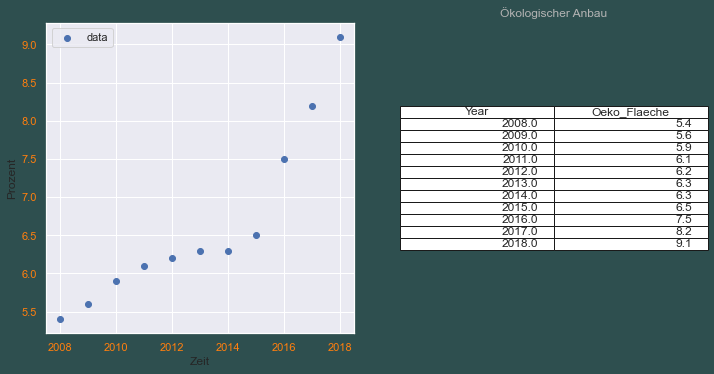

In [3]:

#Dataset loading from csv
Oekologischer_Anbau = pd.read_csv('06_Lineare_Approximation1_Fl.csv', sep=';')  
#Data Cleansing
Oekologischer_Anbau.drop(columns=['Unnamed: 2',	'Unnamed: 3','Unnamed: 4'
], inplace=True)
Oekologischer_Anbau.rename(columns={'Unnamed: 0':'Year', 'Ökologischer Landbau data from bmel':'Oeko_Flaeche'}, inplace=True)

X,y = get_variables(Oekologischer_Anbau.Year, Oekologischer_Anbau.Oeko_Flaeche)
plot_data(X,y, Oekologischer_Anbau)



## Linear_Regression

Bei der linearen Regression wird davon ausgegangen,  
dass sich die Daten durch folgenden Zusammenhang  
bechreiben lassen:

$f(x) = ax + b$

Als Loss_Function wird die _Ordinary  Least Square Method_  
(OLS) genutzt, die folgende Werte annimmt:

Loss = $\sum_{i=1}^N(f(x_i)-y_i)^2$

Diese gilt es zu minimieren.



In [12]:

reg = linear_model.LinearRegression()
reg = reg.fit(X,y)
print_model_params(reg)

'The approximated linear Trend is: y = [0.31454545] x + -626.5345454545457: The Model-Score is 0.8290581717451477'

### Data_and_Resiudual_Plot

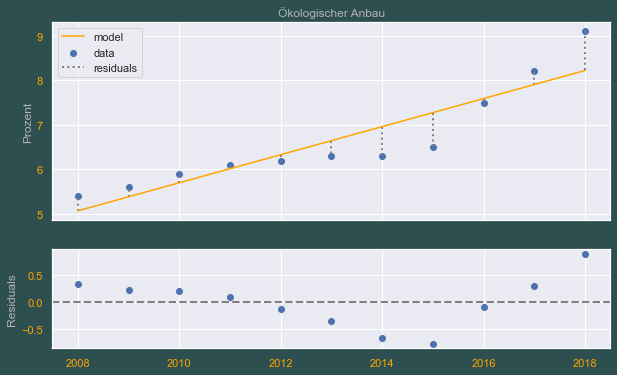

In [7]:

title= 'Ökologischer Anbau'
plot_residuals(reg, X,y, title)


## Polynominal_Regression

Bei der polynomen Regression (hier Grad 3) werden die  
Input Feature für das jeweilige Model entsprechend  
transformiert. Das zu trainierende Polynom hat die Form:

$ f(x) = ax^3 + bx^2+ cx +d$

Die Loss Funktion entspricht ebenfalls der OLS Methode. 

In [13]:

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
polyreg = linear_model.LinearRegression()
polyreg = polyreg.fit(X_poly, y)

print_poly_params(polyreg)


'The Model-Score is 0.9865331308761183'

### Explanatory_Data_Visualisation

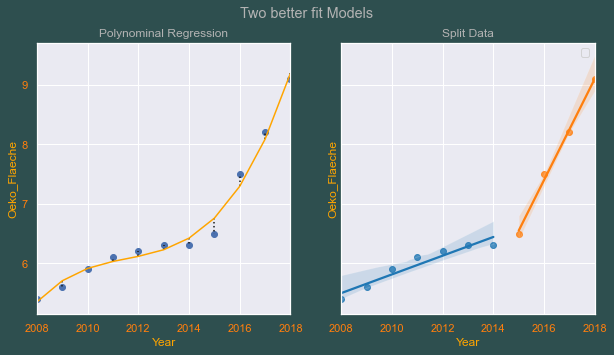

In [14]:

Dummy = np.array(['f','f','f','f','f','f','f','s','s','s','s'])
Oekologischer_Anbau = get_df_with_Dummy(Oekologischer_Anbau, Dummy)
plot_twoDistinct(X,X_poly,y, polyreg, Oekologischer_Anbau)
